In [1]:
#IMPORTANDO BIBLIOTECAS IMPORTANTES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Modules.Sama_Irai import calang,caldist

In [3]:
# Criacao do dataframe1 aqui:
irai = pd.read_excel('Irai(RS).xls',sheet_name=2,skiprows=4,usecols=[0,19])
irai['Lat'] = -27.18
irai['Long'] = -53.23 

sama = pd.read_excel('Sama.xls')

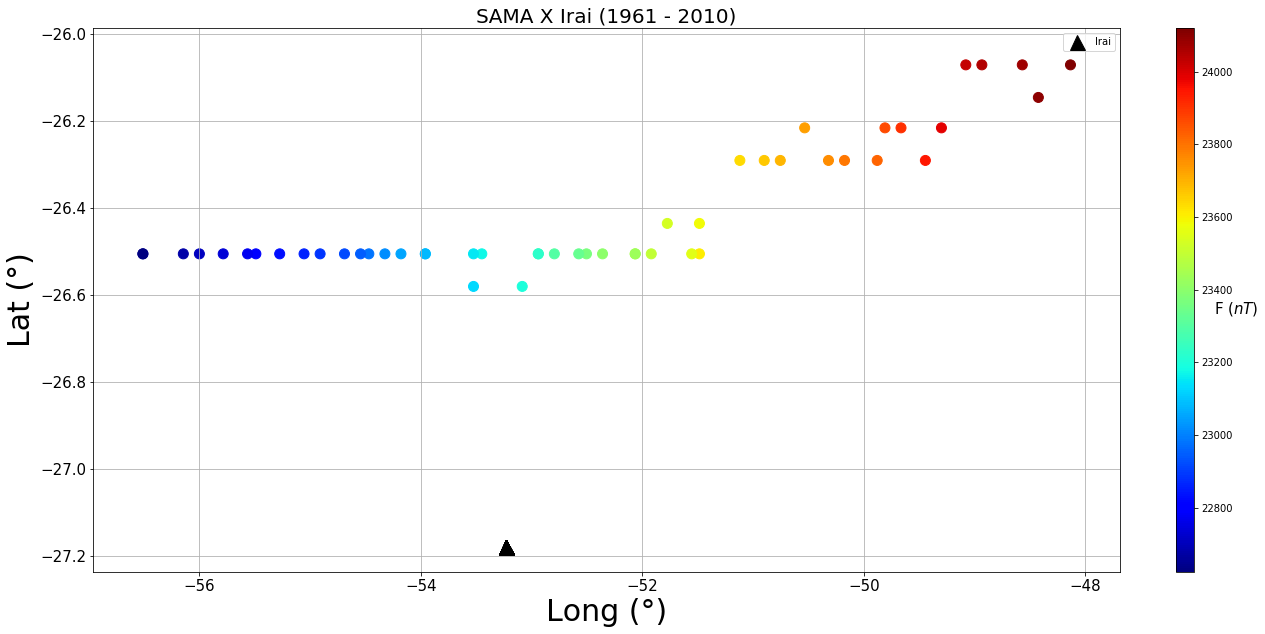

In [4]:
#Plot do centro da SAMA vs Irai no periodo de 1961 a 2010
#Gráficos aqui:
plt.figure(figsize=(20,10))

plt.title('SAMA X Irai (1961 - 2010)', fontsize=20)
p1 = plt.plot(irai['Long'], irai['Lat'], '^k', markersize = 15, label = 'Irai')
plt.legend()
p2 = plt.scatter(sama['Long'],sama['Lat'], c=sama['F'],cmap='jet',s = 100)
cbar = plt.colorbar(p2, aspect=30, fraction = 0.03, orientation="vertical")
cbar.set_label('F $(nT)$',fontsize=15,rotation = 0)
plt.xlabel('Long (°)', fontsize=30)
plt.ylabel('Lat (°)', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.savefig('CentroSAMA vs Irai.pdf', dpi=300, transparet=True, bbox_inches='tight')

plt.show()

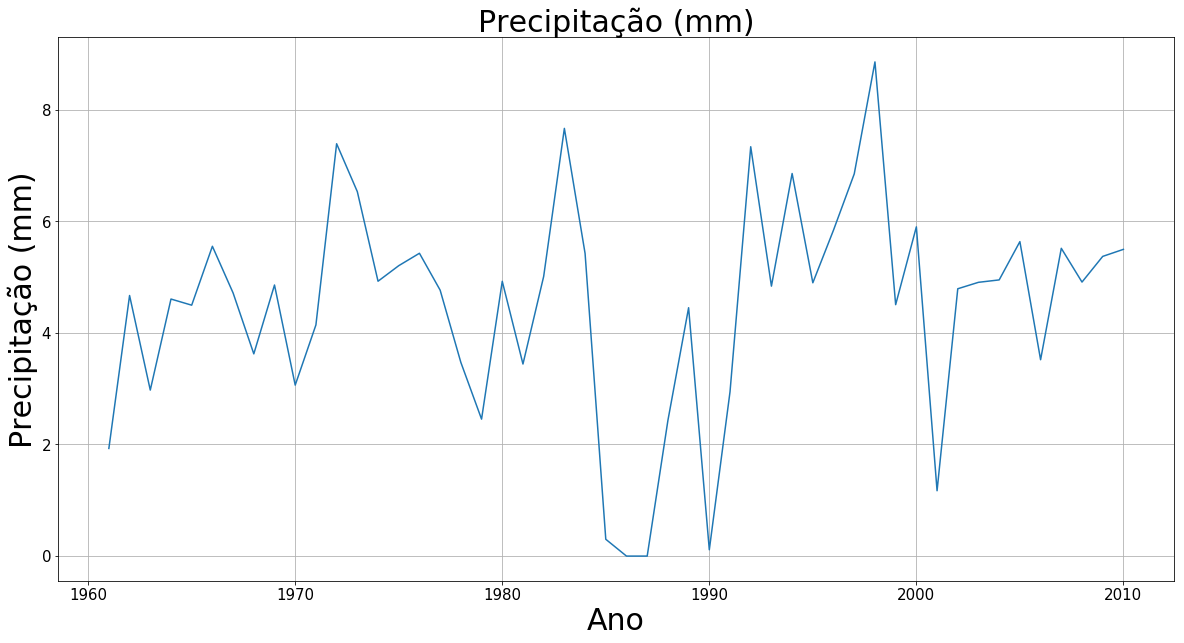

In [5]:
#Plot dos dados de precipitação de IRAI no periodo de 1961 a 2010:
#Gráficos aqui:
plt.figure(figsize=(20,10))

p1 = plt.plot(irai['Ano'],irai['Media'])
plt.xlabel('Ano', fontsize=30)
plt.ylabel('Precipitação (mm)', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Precipitação (mm)',fontsize=30)
plt.grid()
plt.savefig('Precipitacao.pdf', dpi=300, transparet=True, bbox_inches='tight')


plt.show()

In [6]:
#Calculando as distâncias e ângulos entre o centro da SAMA e Irai no periodo de 1961-2010
distances = np.zeros(len(sama['Lat']))
angles = np.zeros(len(sama['Lat']))
for i in range(len(sama['Lat'])):
    distances[i] = caldist(sama['Lat'][i],sama['Long'][i],irai['Lat'][i],irai['Long'][i])
    angles[i] = calang(sama['Lat'][i],sama['Long'][i],irai['Lat'][i],irai['Long'][i])
sama['Distances'] = distances
sama['Angles'] = angles
#sama

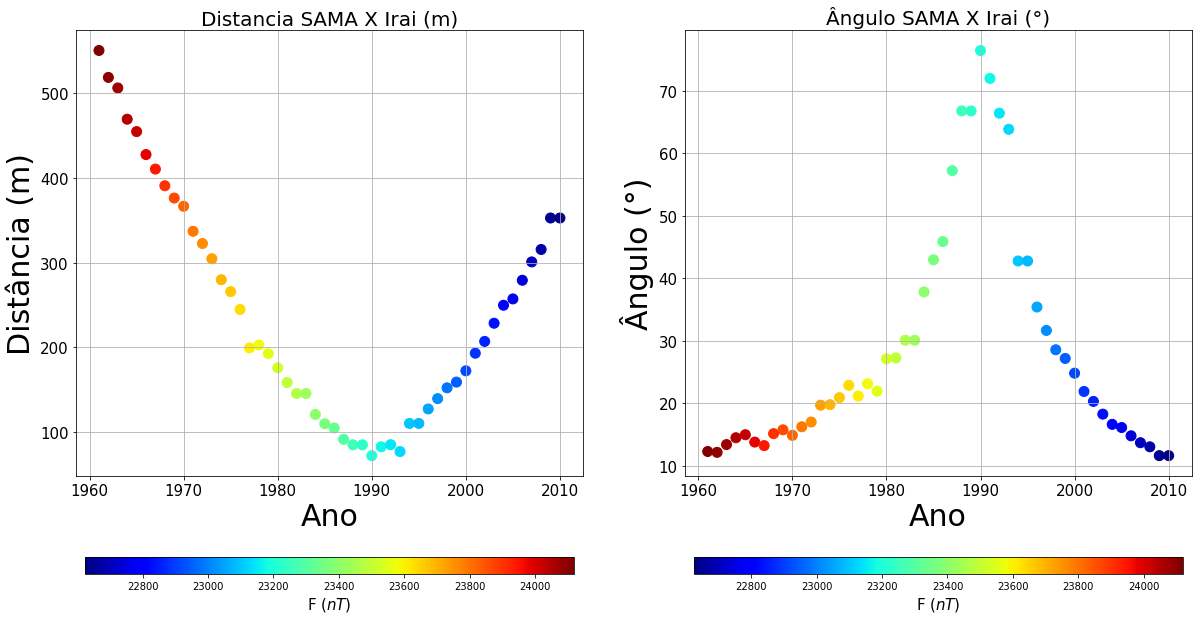

In [7]:
#PLotando as distâncias entre Irai e o centro da SAMA:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title('Distancia SAMA X Irai (m)', fontsize=20)
p2 = plt.scatter(sama['Ano'],sama['Distances'], c=sama['F'],cmap='jet',s = 100)
cbar = plt.colorbar(p2, aspect=30, fraction = 0.03, orientation="horizontal")
cbar.set_label('F $(nT)$',fontsize=15,rotation = 0)
plt.xlabel('Ano', fontsize=30)
plt.ylabel('Distância (m)', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()

plt.subplot(122)
plt.title('Ângulo SAMA X Irai (°)', fontsize=20)
p2 = plt.scatter(sama['Ano'],sama['Angles'], c=sama['F'],cmap='jet',s = 100)
cbar = plt.colorbar(p2, aspect=30, fraction = 0.03, orientation="horizontal")
cbar.set_label('F $(nT)$',fontsize=15,rotation = 0)
plt.xlabel('Ano', fontsize=30)
plt.ylabel('Ângulo (°)', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()


plt.show()